# Week:2 Know your data

### Objective:
The objective of the assignment is to perform statistical analysis on a given data using python libraries and exploratory data analysis using data visualization techniques.

We have to use Fatal Police Shooting Data to answer the questions given in this notebook.

### Fatal Police Shooting Data

**About dataset**\
The dataset consists of following columns
1. **id**                         : unqiue identifier of each victim
2. **name**                       : name of a victim
3. **date**                       : date on fatal shooting
4. **manner_of_death**            : manner of death classification
    * Shot
    * Shot and Tasered
5. **armed**                      : indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    * undetermined: it is not known whether or not the victim had a weapon
    * unknown: the victim was armed, but it is not known what the object was
    * unarmed: the victim was not armed
6. **age**                        : age of victim
7. **gender**                     : the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    * M: Male
    * F: Female
    * None: Unknown
8. **race**                       : race of victim
    * W: White, non-Hispanic
    * B: Black, non-Hispanic
    * A: Asian
    * N: Native American
    * H: Hispanic
    * O: Other
    * None: unknown
9. **city**                       : the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
10. **state**                     : two-letter postal code abbreviation
11. **signs_of_mental_illness**   : News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
12. **threat_level**              : These would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.
13. **flee**                      : News reports have indicated the victim was moving away from officers
    * Foot
    * Car
    * Not fleeing
14. **body_camera**               : News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

## Let's Begin

In [1]:
# Install the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load the dataframe
df = pd.read_csv('week_1_assignment_output.csv')
df.head()

# TODO: Code to fill:
# 1. '<<__A__>>' --> Path of the csv file

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_categories
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior citizens
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult


In [4]:
# Check the shape of the dataset
df.shape

(4478, 15)

### Question: 1 (2 Marks)

Display the count of missing values in each column of a dataset

In [5]:
df.isnull().sum()

# TODO: Code to fill:
# 1. '<<__A__>>' --> Use correct method from pandas library to check for number of missing values


id                           0
name                         0
date                         0
manner_of_death              0
armed                      248
age                        169
gender                       5
race                       373
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       179
body_camera                  0
age_categories               0
dtype: int64

### Question: 2 (2 Marks)
Display the outliers present in the age column using IQR method

In [6]:
# Quantile 1 of age column (25 percentage)
Q1 = df['age'].quantile(0.25)
# Quantile 3 of age column (75 percentage)
Q3 =  df['age'].quantile(0.75)

In [7]:
# Inter Quartile Range
IQR = Q3 - Q1
IQR

18.0

In [8]:
# Outliers present in upper case
upper_case = Q3 + (1.5*IQR)
print(upper_case)
# Outliers present in lower case
lower_case = Q1 - (1.5*IQR)
print(lower_case)

72.0
0.0


In [9]:
# Loop through the each data record in the age column and append a data to the outliers list variable
outliers = []
for i in df['age']:
  if (i < lower_case or i > upper_case):  # if any data point in the age column less than lower case or any data point greater than upper case will be an outlier
    outliers.append(i)

# TODO: Code to fill:

# 1. '<<__A__>>' --> column name
# 2. '<<__B__>>' --> Apply the condition

In [10]:
# print outliers
print(outliers)

[75.0, 74.0, 77.0, 83.0, 76.0, 86.0, 76.0, 77.0, 76.0, 76.0, 80.0, 82.0, 86.0, 76.0, 83.0, 73.0, 91.0, 73.0, 79.0, 74.0, 75.0, 82.0, 76.0, 78.0, 84.0, 84.0, 81.0, 89.0, 73.0, 77.0, 76.0, 84.0, 81.0, 80.0, 77.0, 76.0, 74.0, 76.0, 73.0]


### Question: 3 (2 Marks)
Group the year, gender, age categories to check how many victims were harmed

In [11]:
# Create a new column by extracting year from the date column
df['year'] = pd.to_datetime(df['date']).dt.year

In [27]:
#groupby the year, gender, age_categories columns
df.groupby([ 'year','gender','age_categories'])[['id']].value_counts()
#Replace '<>' with correct method

# TODO: Code to fill:

# 1. '<<__A__>>' --> write your code here by selecting appropriate method/function from python
# 2. '<<__B__>>' --> write column names from dataframe
# 3. '<<__C__>>' --> write your command

year  gender  age_categories  id  
2015  F       Adult           111     1
                              118     1
                              557     1
                              1046    1
                              987     1
                                     ..
2019  M       Youth           4367    1
                              4374    1
                              4376    1
                              4381    1
                              4921    1
Length: 4473, dtype: int64

the above dataframe represents the grouped data of year, gender and age_categories based on the id of the inidviadual victims.

the total number victims harmed are 4473.

### Question: 4 (2 Marks )
Generate a bar plot using seaborn and understand the threat levels of different age categories

Text(0, 0.5, 'Count on Threat Level')

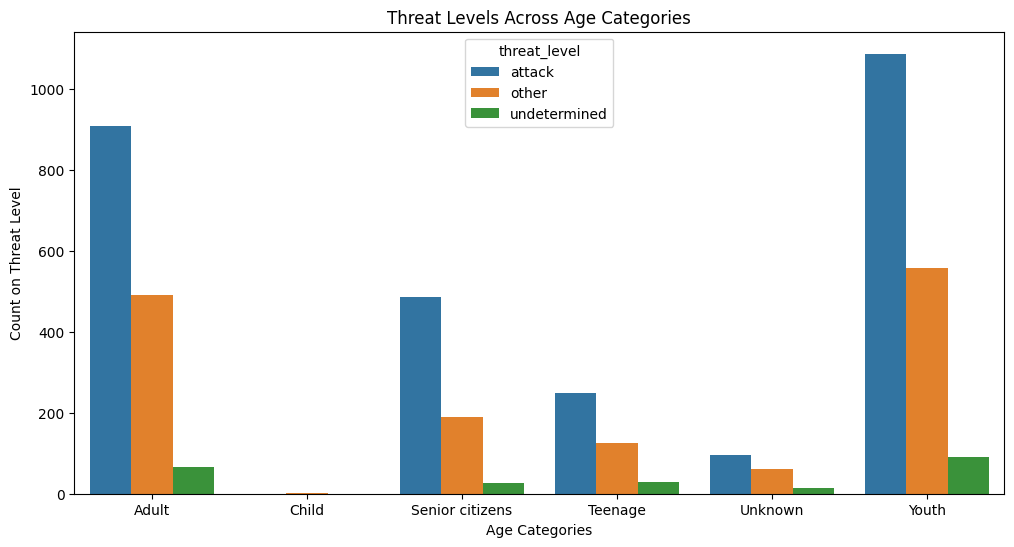

In [25]:
# set a plot size (12,6)
plt.figure(figsize=(12,6))
sns.barplot(x='age_categories', y='Count', hue='threat_level', data=df.groupby(['age_categories','threat_level']).size().to_frame('Count').reset_index())

# Set plot title and x and y axis labels
plt.title('Threat Levels Across Age Categories')
plt.xlabel('Age Categories')
plt.ylabel('Count on Threat Level')

# TODO: Code to fill:
#Replace '<>' with correct method

# 1. '<<__A__>>' --> write your code to set plot size
# 2. '<<__B__>>' --> write your code here by selecting appropriate method from seaborn
# 3. '<<__C__>>' --> write your parameter here to load data
# 4. '<<__D__>>' --> write your hue column

**The types of Threat level(i.e Attack, other, Undertermined) are higher count in the youth age categories.**

**This is followed by the Adult age categories.**

### Question: 5 (2 Marks )
Generate a bar plot using seaborn and understand the year wise kills based on victim race

Text(0, 0.5, 'count')

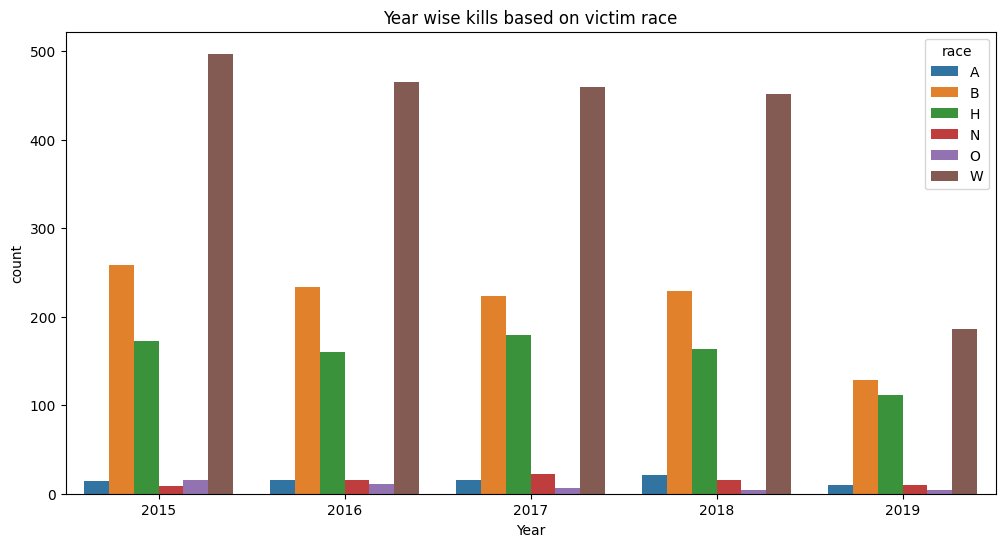

In [16]:
# set a plot size (12,6)
plt.figure(figsize=(12,6))
sns.barplot(x='year', y='Count', hue='race', data=df.groupby(['year','race']).size().to_frame('Count').reset_index())

# Set plot title and x and y axis labels
plt.title('Year wise kills based on victim race')
plt.xlabel('Year')
plt.ylabel('count')

In all the years (i.e from 2015 to 2019) the year wise kill of Whites are all time high.

This is followed by the Blacks in all the years.

In [28]:
# Save the data into csv to use for week-3 assignment
df.to_csv("week_2_assignment_output.csv",index=False)

## Thank you!